# cylinder Data Processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

from fatiando import utils
from matplotlib import colors, ticker, cm
from IPython.display import Image as img

# Importing the background

In [ ]:
bname = 'background/Data_20190724_144705_back0.dat'

In [ ]:
back1 = pd.read_csv(bname, skiprows=2, delim_whitespace=True, usecols=(3, 9, 10, 11), header=None, names=['V', 'Sx', 'Sy', 'Sz'], nrows=1022)

back2 = pd.read_csv(bname, skiprows=1024, delim_whitespace=True, usecols=(3, 5, 6, 7), header=None, names=['V', 'Sx', 'Sy', 'Sz'])

back = pd.concat([back1, back2])

volt = back['V'].get_values()
train_dist = (volt - volt[0])*129.6/(volt[0] - volt[-1])
print train_dist

sy_dist = train_dist
sz_dist = train_dist - 1.5
sx_dist = train_dist - 3.

maskz = (sz_dist <= 0.) & (sz_dist >= -133.6)

dz = {'Sz': back['Sz'].get_values(), 'Sz_dist': sz_dist}
dz = pd.DataFrame(data=dz)
dz = dz[maskz].reset_index().drop(labels='index', axis=1)

masky = (sy_dist >= -133.6)

dy = {'Sy': back['Sy'].get_values(), 'Sy_dist': sy_dist}
dy = pd.DataFrame(data=dy)
dy = dy[masky].reset_index().drop(labels='index', axis=1)

maskx = (sx_dist <= 0.) & (sx_dist >= -133.6)

dx = {'Sx': back['Sx'][:], 'Sx_dist': sx_dist}
dx = pd.DataFrame(data=dx)
dx = dx[maskx].reset_index().drop(labels='index', axis=1)

size = np.array([sx_dist[maskx].size, sy_dist[masky].size, sz_dist[maskz].size])

lim = np.min(size)
print lim

df = {'Sx': dx['Sx'][:lim], 'Sy': dy['Sy'][:lim], 'Sz': dz['Sz'][:lim]}
df = pd.DataFrame(data=df)

dw = {'Line': np.ones(lim, dtype=np.int8) + 0}
back_dfw = pd.DataFrame(data=dw)
back_dfw
back_dfw.loc[:, 'X'] = 0.
back_dfw.loc[:, 'Y'] = dx['Sx_dist']
back_dfw.loc[:, 'Bx'] = (df['Sy'] - df['Sx'])/np.sqrt(2.)
back_dfw.loc[:, 'By'] = - df['Sz']
back_dfw.loc[:, 'Bz'] = (df['Sy'] + df['Sx'])/np.sqrt(2.)
back_dfw.loc[:, 'Bm'] = np.sqrt(back_dfw['Bx']**2. + back_dfw['By']**2. + back_dfw['Bz']**2.)

### Reading train data files

In [ ]:
existing_file = glob.glob("*.csv")
existing_file

In [ ]:
if existing_file != []:
    for i in range(len(existing_file)):
        os.remove(existing_file[i])   

In [ ]:
fnames = sorted(glob.glob('*.dat'))
fnames

In [ ]:
for n, name in enumerate(fnames):

    print n, name
    data1 = pd.read_csv(name, skiprows=2, delim_whitespace=True, usecols=(3, 9, 10, 11), header=None, names=['V', 'Sx', 'Sy', 'Sz'], nrows=1022)

    data2 = pd.read_csv(name, skiprows=1024, delim_whitespace=True, usecols=(3, 5, 6, 7), header=None, names=['V', 'Sx', 'Sy', 'Sz'])

    data = pd.concat([data1, data2])

    volt = data['V'].get_values()
    train_dist = (volt - volt[0])*129.6/(volt[0] - volt[-1])
    print train_dist

    sy_dist = train_dist
    sz_dist = train_dist - 1.5
    sx_dist = train_dist - 3.

    maskz = (sz_dist <= 0.) & (sz_dist >= -133.6)

    dz = {'Sz': data['Sz'].get_values(), 'Sz_dist': sz_dist}
    dz = pd.DataFrame(data=dz)
    dz = dz[maskz].reset_index().drop(labels='index', axis=1)

    masky = (sy_dist >= -133.6)

    dy = {'Sy': data['Sy'].get_values(), 'Sy_dist': sy_dist}
    dy = pd.DataFrame(data=dy)
    dy = dy[masky].reset_index().drop(labels='index', axis=1)

    maskx = (sx_dist <= 0.) & (sx_dist >= -133.6)

    dx = {'Sx': data['Sx'][:], 'Sx_dist': sx_dist}
    dx = pd.DataFrame(data=dx)
    dx = dx[maskx].reset_index().drop(labels='index', axis=1)

    size = np.array([sx_dist[maskx].size, sy_dist[masky].size, sz_dist[maskz].size])

    lim = np.min(size)
    print lim

    df = {'Sx': dx['Sx'][:lim], 'Sy': dy['Sy'][:lim], 'Sz': dz['Sz'][:lim]}
    df = pd.DataFrame(data=df)

    dw = {'Line': np.ones(lim, dtype=np.int8) + n}
    dfw = pd.DataFrame(data=dw)
    dfw
    dfw.loc[:, 'X'] = n*2.
    dfw.loc[:, 'Y'] = dx['Sx_dist']
    dfw.loc[:, 'Bx'] = (df['Sy'] - df['Sx'])/np.sqrt(2.)
    dfw.loc[:, 'By'] = - df['Sz']
    dfw.loc[:, 'Bz'] = (df['Sy'] + df['Sx'])/np.sqrt(2.)
    dfw.loc[:, 'Bm'] = np.sqrt(dfw['Bx']**2. + dfw['By']**2. + dfw['Bz']**2.)
    dfw.loc[:, 'Bm_res'] = dfw['Bm'] - back_dfw['Bm']

    if n == 0:
        header = True
    else:
        header = False
    dfw.to_csv('cylinder_data.csv', index=None, sep=',', mode='a', header=header)

In [ ]:
dobs = pd.read_csv('cylinder_data.csv')

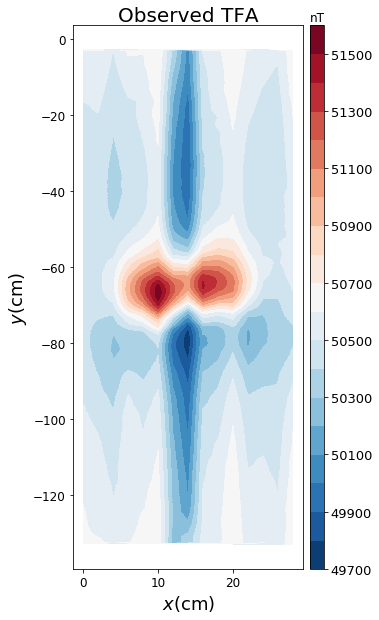

In [14]:
plt.figure(figsize=(5,10))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(dobs['X'], dobs['Y'], dobs['Bm'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$x$(cm)', fontsize=18)
plt.ylabel('$y$(cm)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

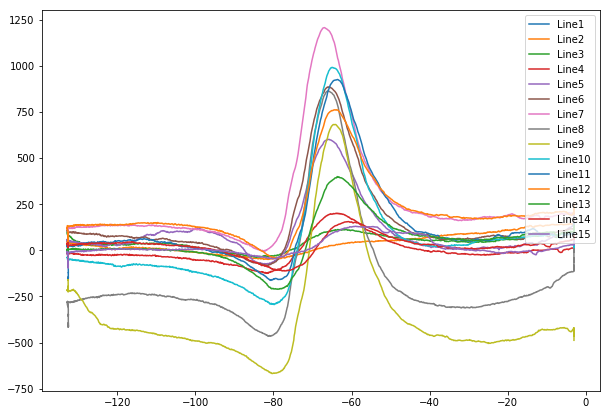

In [19]:
line = []
plt.figure(figsize=(10,7))
for i in range(15):
    mask = (dobs['Line'] == i)
    plt.plot(dobs[mask]['Y'], dobs[mask]['Bm_res'])
    line.append('Line'+str(i+1))
plt.legend(line,loc=1)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(dobs['X'], dobs['Y'], dobs['Bm_res'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$x$(cm)', fontsize=18)
plt.ylabel('$y$(cm)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

In [12]:
dobs['Line']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
44950    15
44951    15
44952    15
44953    15
44954    15
44955    15
44956    15
44957    15
44958    15
44959    15
44960    15
44961    15
44962    15
44963    15
44964    15
44965    15
44966    15
44967    15
44968    15
44969    15
44970    15
44971    15
44972    15
44973    15
44974    15
44975    15
44976    15
44977    15
44978    15
44979    15
Name: Line, Length: 44980, dtype: int64